# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Hasan Imran - 407380 
    2. Sana Kanji - 407536
    3. Hussain Ali - 403373

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [113]:
#your code
import pandas as pd
import numpy as np
import random

data = pd.read_csv('datasets/air_pollution.csv',)

#the seed is the student id of Hussain Ali
air_pollution_sample = data.sample(frac=0.9,random_state=403373)
air_pollution_sample=air_pollution_sample.reset_index(drop=True)
air_pollution_2 = air_pollution_sample.to_csv(r'datasets/air_pollution_2.csv', index = None, header=True)
air_pollution_sample.head(2)

Date      Time   CO  Benzene  NO2  Temperature  Humidity(%)  \
0  05.02.05   8:00:00  3.1     12.7  283          2.0         63.6   
1  20.03.04  12:00:00  2.6     11.7  108         16.3         50.0   

   Traffic_Volume  Particulate_Matter  
0             NaN                 NaN  
1       34.322433           51.570678

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [114]:
#import libraries and data set

dataset_1 = pd.read_csv(r'datasets/air_pollution_2.csv',infer_datetime_format=True,parse_dates=[0,1])
dataset_1 = dataset_1.drop(['Traffic_Volume','Particulate_Matter'], axis=1)

print(dataset_1.shape)
dataset_1.head(2)

(8421, 7)


Date                Time   CO  Benzene  NO2  Temperature  Humidity(%)
0 2005-05-02 2020-01-25 08:00:00  3.1     12.7  283          2.0         63.6
1 2004-03-20 2020-01-25 12:00:00  2.6     11.7  108         16.3         50.0

(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

### Assumption

That it is required for date and time column to be in the format rather than of dataype to which it conforms that is datetime64 and time as hourly as per the description of the dataset '....hourly results of...'. Since, it is converted to an object datatype as we went to conform it with the format required in the question

In [115]:
#your code
from datetime import datetime

df=dataset_1.copy()
df['Date'] =df['Date'].dt.date
df['Time'] =df['Time'].dt.time

description_time_feature=pd.DataFrame({
    "Date":[min(df['Date']),max(df['Date'])],
    "Time":[min(df['Time']),max(df['Time'])]
},index=['Min','Max'])

d=description_time_feature.dtypes
d.name='Data type'
description_time_feature=description_time_feature.append(d)
print("\n====Time Features====")
# print(description_time_feature)
description_time_feature


====Time Features====


Date      Time
Min        2004-01-04  00:00:00
Max        2005-12-03  23:00:00
Data type      object    object

In [116]:

numerical_features=df.copy().drop(['Date','Time'], axis=1)
description_numerical_features=numerical_features.describe(percentiles=[])

row=numerical_features.dtypes
row.name='Data type'
description_numerical_features=description_numerical_features.append(row)

print("\n====Numerical Features====")
description_numerical_features


====Numerical Features====


CO  Benzene      NO2 Temperature Humidity(%)
count         8421     8421     8421        8421        8421
mean      -34.4534  1.85867  57.7263     9.80502     39.3904
std        77.8655  41.4888  127.225     43.3117     51.3203
min           -200     -200     -200        -200        -200
50%            1.5      7.9       96        17.3        48.4
max           11.9     63.7      340        44.3        88.7
Data type  float64  float64    int64     float64     float64

(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

## Explanation:
Date and time separately allows more freedom/leeway over most analysis of different trends and would be more suitable. For instance transforming for analysis on granular units in time when they are both combined.  

In [117]:
#your code
# df=dataset_1.copy()
df['Date']=df['Date'].astype('str')
df['Time']=df['Time'].astype('str')
df['Datetime']= pd.to_datetime(df['Date'] + ' ' +df['Time'], errors='coerce')
df=df.drop(['Date','Time'],axis=1)
df.head(2)

CO  Benzene  NO2  Temperature  Humidity(%)            Datetime
0  3.1     12.7  283          2.0         63.6 2005-05-02 08:00:00
1  2.6     11.7  108         16.3         50.0 2004-03-20 12:00:00

(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

In [118]:
# Checking for NA values
df.isnull().describe()

CO Benzene    NO2 Temperature Humidity(%) Datetime
count    8421    8421   8421        8421        8421     8421
unique      1       1      1           1           1        1
top     False   False  False       False       False    False
freq     8421    8421   8421        8421        8421     8421

In [119]:
# checking for mean, min, max, std
df.describe(percentiles=[])

CO      Benzene          NO2  Temperature  Humidity(%)
count  8421.000000  8421.000000  8421.000000  8421.000000  8421.000000
mean    -34.453438     1.858675    57.726280     9.805023    39.390429
std      77.865452    41.488818   127.224686    43.311672    51.320329
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000
50%       1.500000     7.900000    96.000000    17.300000    48.400000
max      11.900000    63.700000   340.000000    44.300000    88.700000

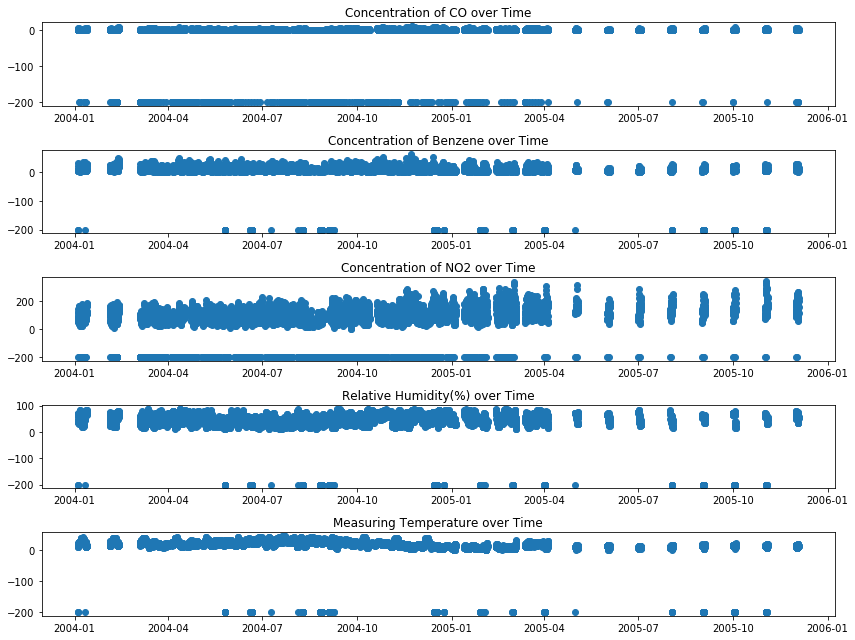

In [120]:
#your code
import matplotlib.pyplot as plt
import seaborn as sns;
# import datetime

#making the skeleton for the plots
fig, ([ax1, ax2,ax3,ax4,ax5]) = plt.subplots(figsize=(12,9), ncols=1, nrows=5)
#For original dataset

ax1.set_title("Concentration of CO over Time")
ax1.plot_date(df['Datetime'], df['CO'])

ax2.set_title("Concentration of Benzene over Time")
ax2.plot_date(df['Datetime'], df['Benzene'])

ax3.set_title("Concentration of NO2 over Time")
ax3.plot_date(df['Datetime'], df['NO2'])


ax4.set_title("Relative Humidity(%) over Time")
ax4.plot_date(df['Datetime'], df['Humidity(%)'])

ax5.set_title("Measuring Temperature over Time")
ax5.plot_date(df['Datetime'], df['Temperature'])

fig.tight_layout()


### Explanation: 
With the help of scatterplots and statistical computations, there exists implausible values having -200 which are far from the mean and unlikely to be true. These data quality issues are in 'Benzene, CO, NO2, Temperature and Humidity(%)'. Morever, tuples exists where all the values are having -200 which will reduce the statistical power and estimate biased results. 

In different perspective, values for CO, Benzene and NO2 measurements should be non-negative.

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

### Count of Implausible values

In [121]:
implausible_values = pd.DataFrame({'Benzene':df[~(df['Benzene'] != -200)]['Benzene'],
                 'CO':df[~(df['CO'] != -200)]['CO'],
                 'NO2':df[~(df['NO2'] != -200)]['NO2'],
                 'Temperature':df[ ~(df['Temperature'] != -200)]['Temperature'],
                 'Humidity(%)':df[~((df['Humidity(%)'] != -200)) ]['Humidity(%)']    
})
implausible_values.describe(percentiles=[])

Benzene      CO     NO2  Temperature  Humidity(%)
count    331.0  1525.0  1488.0        331.0        331.0
mean    -200.0  -200.0  -200.0       -200.0       -200.0
std        0.0     0.0     0.0          0.0          0.0
min     -200.0  -200.0  -200.0       -200.0       -200.0
50%     -200.0  -200.0  -200.0       -200.0       -200.0
max     -200.0  -200.0  -200.0       -200.0       -200.0

### Part 1

In [122]:
#your code


data_statistics=pd.DataFrame({'Benzene':df[df['Benzene'] != -200]['Benzene'],
                 'CO':df[df['CO'] != -200]['CO'],
                 'NO2':df[df['NO2'] != -200]['NO2'],
                 'Temperature':df[ (df['Temperature'] != -200)]['Temperature'],
                 'Humidity(%)':df[(df['Humidity(%)'] != -200)  ]['Humidity(%)']    
})

# Collecting means so can fill up in the next steps
mean_benz=np.mean(data_statistics['Benzene'])
mean_co=np.mean(data_statistics['CO'])
mean_no2=np.mean(data_statistics['NO2'])
mean_temp=np.mean(data_statistics['Temperature'])
mean_humid=np.mean(data_statistics['Humidity(%)'])

data_statistics.describe(percentiles=[])


Benzene           CO          NO2  Temperature  Humidity(%)
count  8090.000000  6896.000000  6933.000000  8090.000000  8090.000000
mean     10.117664     2.155974   113.040964    18.389135    49.185019
std       7.495604     1.460420    48.397515     8.817815    17.337327
min       0.100000     0.100000     2.000000    -1.400000     9.200000
50%       8.200000     1.800000   109.000000    17.800000    49.400000
max      63.700000    11.900000   340.000000    44.300000    88.700000

### Part 2

In [123]:
# Removing numerical features which have all row values implausible
cleaned_dataset=df.copy()
print(cleaned_dataset.shape)
contains_no_implausible= (cleaned_dataset['Benzene'] == -200) & (cleaned_dataset['CO'] == -200) &(cleaned_dataset['NO2'] == -200)&(cleaned_dataset['Temperature'] == -200) &(cleaned_dataset['Humidity(%)'] == -200)
cleaned_dataset=cleaned_dataset[~(contains_no_implausible)].reset_index(drop=True)
print(cleaned_dataset.shape)

(8421, 6)
(8391, 6)


In [124]:
# Replace implausible values with the mean

def replaceMissing(x):
#     print(x)
    if x['Benzene']==-200:
        x['Benzene']=mean_benz
    if x['CO']==-200:
        x['CO']=mean_co
    if x['NO2']==-200:
        x['NO2']=mean_no2
    if x['Temperature']==-200:
        x['Temperature']=mean_temp
    if x['Humidity(%)']==-200:
        x['Humidity(%)']=mean_humid  
    return x

cleaned_dataset=cleaned_dataset.apply(replaceMissing, axis=1)
print(cleaned_dataset.shape)
cleaned_dataset.head(2)

(8391, 6)


CO  Benzene    NO2  Temperature  Humidity(%)            Datetime
0  3.1     12.7  283.0          2.0         63.6 2005-05-02 08:00:00
1  2.6     11.7  108.0         16.3         50.0 2004-03-20 12:00:00

### Part 3

In [125]:
print("===== Cleaned Dataset==========")
cleaned_dataset.describe(percentiles=[])

===== Cleaned Dataset==========


CO      Benzene          NO2  Temperature  Humidity(%)
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000
mean      2.155974    10.117664   113.040964    18.389135    49.185019
std       1.323926     7.359919    43.991762     8.658197    17.023489
min       0.100000     0.100000     2.000000    -1.400000     9.200000
50%       2.155974     8.500000   113.040964    18.300000    49.185019
max      11.900000    63.700000   340.000000    44.300000    88.700000

### Part 4

Explanation: We employed two strategies for handling implausible values. First is to remove the tuples where the whole tuple have implausible values. Secondly, we transform the tuples with the mean of the feature column replacing implausible value. Second one is disadvantageous such that except CO, other features are largely spread from the mean which says that filling missing values for those features with mean is making them far from the true value but better than the implausible ones. 

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [126]:
#your code

air_pollution_2 = pd.read_csv(r'datasets/air_pollution_2.csv')

air_pollution_2_dropped = air_pollution_2.drop(['Traffic_Volume', 'Particulate_Matter'], axis=1)

print("Removed columns 'Traffic_Volume' and 'Particulate_Matter'")
print(air_pollution_2_dropped.shape)

Removed columns 'Traffic_Volume' and 'Particulate_Matter'
(8421, 7)


In [127]:
air_pollution_2_dropped['Date'] = air_pollution_2_dropped['Date'].astype(str)
air_pollution_2_dropped['Time'] = air_pollution_2_dropped['Time'].astype(str)

air_pollution_2_dropped['Datetime'] = pd.to_datetime(air_pollution_2_dropped['Date'] + ' ' +air_pollution_2_dropped['Time'], errors='coerce',format='%d.%m.%y %H:%M:%S')
air_pollution_2_dropped_date_time = air_pollution_2_dropped.drop(['Date','Time'],axis=1)

print("Added Datetime column")
print(air_pollution_2_dropped_date_time.shape)

Added Datetime column
(8421, 6)


In [128]:
air_pollution_2_restricted = air_pollution_2_dropped_date_time[(air_pollution_2_dropped_date_time['Datetime'] > '2004-04-01') & (air_pollution_2_dropped_date_time['Datetime'] < '2005-03-31')]

print("Removed all data except between 2004-04-01 and 2005-03-31")
print(air_pollution_2_restricted.shape)

Removed all data except between 2004-04-01 and 2005-03-31
(7852, 6)


In [129]:
air_pollution_2_restricted.dropna()

air_pollution_2_restricted = air_pollution_2_restricted[air_pollution_2_restricted['CO'] > -37]
air_pollution_2_restricted = air_pollution_2_restricted[air_pollution_2_restricted['Benzene'] > -37]
air_pollution_2_restricted = air_pollution_2_restricted[air_pollution_2_restricted['NO2'] > -37]
air_pollution_2_restricted = air_pollution_2_restricted[air_pollution_2_restricted['Temperature'] > -37]
air_pollution_2_final = air_pollution_2_restricted[air_pollution_2_restricted['Humidity(%)'] > -37]

print("Final dataframe with removed missing values and values below -37")
air_pollution_2_final.head(5)

Final dataframe with removed missing values and values below -37


CO  Benzene  NO2  Temperature  Humidity(%)            Datetime
0  3.1     12.7  283          2.0         63.6 2005-02-05 08:00:00
2  7.3     33.7  158         17.4         47.8 2004-04-15 19:00:00
3  2.6     20.1  223          7.3         76.8 2005-01-22 00:00:00
5  1.9      8.5  128         10.3         32.6 2004-12-22 13:00:00
6  1.3      6.0  100         13.4         36.3 2004-11-08 13:00:00

(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [130]:
#your code

#preprocessing for steamgraph

temperature_mean = air_pollution_2_final.groupby([air_pollution_2_final.Datetime.dt.month])['Temperature'].mean().reset_index(name='Monthly Average Temperature')

humidity_mean = air_pollution_2_final.groupby([air_pollution_2_final.Datetime.dt.month])['Humidity(%)'].mean().reset_index(name='Monthly Average Humidity')

CO_mean = air_pollution_2_final.groupby([air_pollution_2_final.Datetime.dt.month])['CO'].mean().reset_index(name='Monthly Average CO')

print("Mean value's for temperature month wise")
print(temperature_mean)
print()

print("Mean value's for humidity month wise")
print(humidity_mean)
print()

print("Mean value's for CO month wise")
print(CO_mean)


Mean value's for temperature month wise
    Datetime  Monthly Average Temperature
0          1                     8.654580
1          2                     7.189683
2          3                    13.411074
3          4                    16.913107
4          5                    21.066992
5          6                    27.310609
6          7                    29.491786
7          8                    29.780697
8          9                    23.729082
9         10                    21.141765
10        11                    13.788266
11        12                    11.359188

Mean value's for humidity month wise
    Datetime  Monthly Average Humidity
0          1                 56.569847
1          2                 51.650595
2          3                 50.397851
3          4                 48.592476
4          5                 41.623242
5          6                 37.924165
6          7                 32.860780
7          8                 42.098660
8          9             

C:\Users\Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


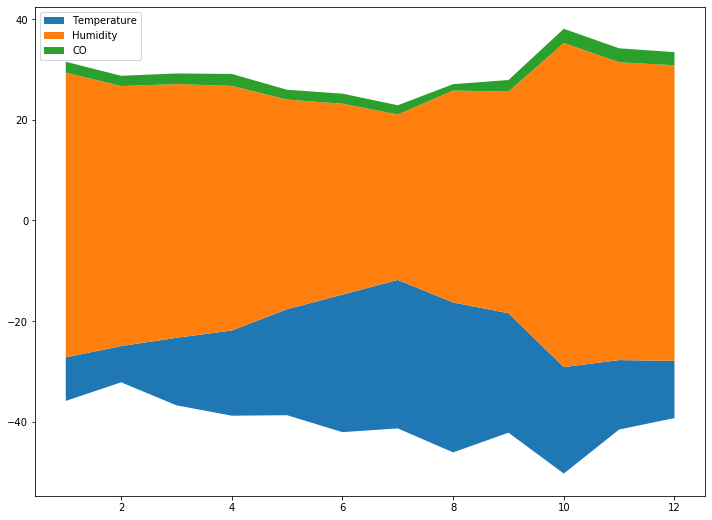

In [131]:

import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------
#Steam graph 1

# the labels
labels = ["Temperature", "Humidity", "CO"]

#months as x
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig, ax = plt.subplots(figsize=(12,9))

ax.stackplot(x, temperature_mean['Monthly Average Temperature'], humidity_mean['Monthly Average Humidity'], CO_mean['Monthly Average CO'], labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()


In [132]:

#Normalization

from sklearn import preprocessing

temperature_mean_array = temperature_mean[['Monthly Average Temperature']].values.astype(float)
humidity_mean_array = humidity_mean[['Monthly Average Humidity']].values.astype(float)
CO_mean_array = CO_mean[['Monthly Average CO']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
temperature_mean_array_normalized = min_max_scaler.fit_transform(temperature_mean_array)
humidity_mean_array_normalized = min_max_scaler.fit_transform(humidity_mean_array)
CO_mean_array_normalized = min_max_scaler.fit_transform(CO_mean_array)

temperature_mean_array_normalized_list = []
for array in temperature_mean_array_normalized:
    for value in array:
        temperature_mean_array_normalized_list.append(value)

humidity_mean_array_normalized_list = []
for array in humidity_mean_array_normalized:
    for value in array:
        humidity_mean_array_normalized_list.append(value)

CO_mean_array_normalized_list = []
for array in CO_mean_array_normalized:
    for value in array:
        CO_mean_array_normalized_list.append(value)

print("Normalized values")
print('temperature')
print(temperature_mean_array_normalized_list)
print()
print('humidity')
print(humidity_mean_array_normalized_list)
print()
print('CO')
print(CO_mean_array_normalized_list)


Normalized values
temperature
[0.06484425975023567, 0.0, 0.27539231748016424, 0.43041113764896843, 0.6142844820405565, 0.8906605981604064, 0.9872112603373427, 0.9999999999999999, 0.7321229015514062, 0.6175943165035056, 0.29208885934181894, 0.18456477430121898]

humidity
[0.7519923036335581, 0.5959659317369246, 0.5562320255642608, 0.49897003007989693, 0.277923374140816, 0.1605978990977759, 0.0, 0.2930024226965351, 0.35347001100120345, 1.0, 0.8339866024671578, 0.8201247067224087]

CO
[0.5729974959277742, 0.5052622530789599, 0.543902155719036, 0.7189280684411428, 0.44283629883824216, 0.47780239134131963, 0.3666681195285262, 0.0, 0.681469651199174, 1.0, 0.9753099995814818, 0.8619332258421792]


C:\Users\Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


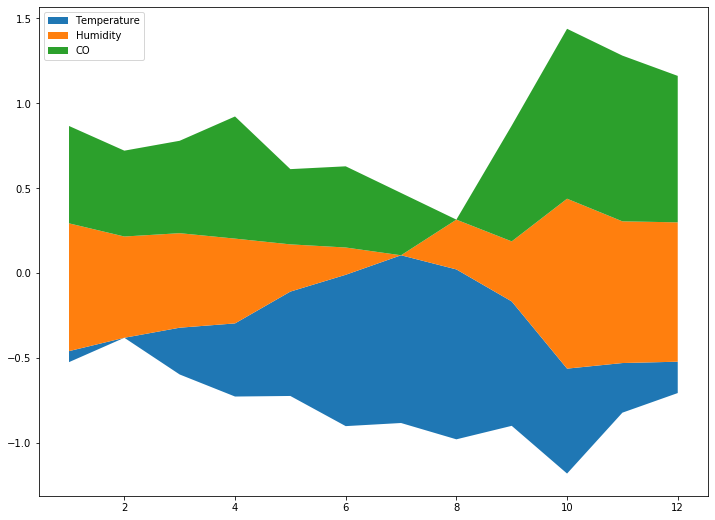

In [133]:

#----------------------------------------------------------------------------------------
#Steam graph 2

# the labels
labels = ["Temperature", "Humidity", "CO"]

#months as x
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig, ax = plt.subplots(figsize=(12,9))

ax.stackplot(x, temperature_mean_array_normalized_list, humidity_mean_array_normalized_list, CO_mean_array_normalized_list, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

### Explanation:

1) In the seventh month the average CO is the lowest. I derived the answer by looking at the lowest point in the both steam graph for CO. It is more clearer from the second steamgraph as it is more scaled.

2) Using the first steamgraph it seems that the humidity and CO are positivily related as we can see that in the start the steamgraph of both are decreasing and then later on it seems that both are increasing. From the second steamgraph it is more hard to distinguish a relationship but still the same trend can be seen that from month 10-12 both are decreasing and from month 1-8 both are gradually decreasing.

3) From months 2-8 the temperature is increasing as seen from the data. However, when we interpret the steamgraphs we can observe that the temperature is increasing from the months 2-7. The increase is much more prominent in the normalized steamgraph as compared to the first steamgraph.

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [134]:
#your code

#your code
from sklearn import preprocessing

temperature = air_pollution_2_final[['Temperature']].values.astype(float)
humidity = air_pollution_2_final[['Humidity(%)']].values.astype(float)

discretizer = preprocessing.KBinsDiscretizer(n_bins=12, encode='ordinal', strategy = 'uniform')
temperature_discretized = discretizer.fit_transform(temperature)
humidity_discretized = discretizer.fit_transform(humidity)

temperature_discritized_list = []
for array in temperature_discretized:
    for value in array:
        temperature_discritized_list.append(value)

humidity_discritized_list = []
for array in humidity_discretized:
    for value in array:
        humidity_discritized_list.append(value)
        
dict = {'temperature': temperature_discritized_list, 'humidity': humidity_discritized_list, 'CO': air_pollution_2_final['CO']}  
df = pd.DataFrame(dict) 
df


temperature  humidity   CO
0             0.0       8.0  3.1
2             4.0       5.0  7.3
3             2.0      10.0  2.6
5             3.0       3.0  1.9
6             3.0       4.0  1.3
...           ...       ...  ...
8413          9.0       1.0  2.5
8414          3.0       9.0  1.0
8415          3.0       4.0  2.4
8418          3.0       9.0  1.0
8420          7.0       5.0  1.0

[5697 rows x 3 columns]

## Explanation

To encode both the temperature and humidity, the encoding scheme used is the ordinal one. This is because we wanted 12 different bins each having ordinal attributes so that we can use them further for the heatmap. 

For the strategy parameter, uniform is used. This is because we decided that each bin should have equal values in them so that the heatmap is more uniform. 

(e) Use the modified data to create a heat map as specified in question part (c). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

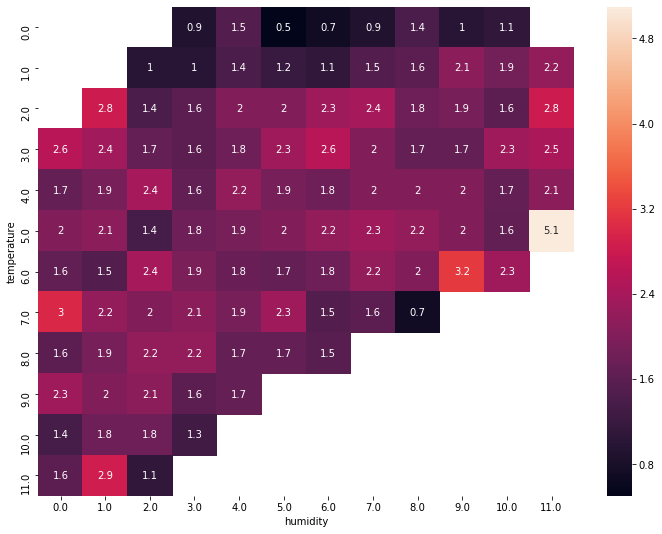

In [135]:
#your code

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,9))


sns.heatmap(pd.pivot_table(df, values='CO', index=['temperature'], columns=['humidity'], aggfunc=np.median), annot=True, ax=ax)

## Explanation:

1) The median CO is highest with value 3.2 at the Temperature bin of 6 and humidity bin of 9.

2) Empty fields on the heatmap show that for the combination of the Temperature and humidity values there exists no CO value for that combination. 


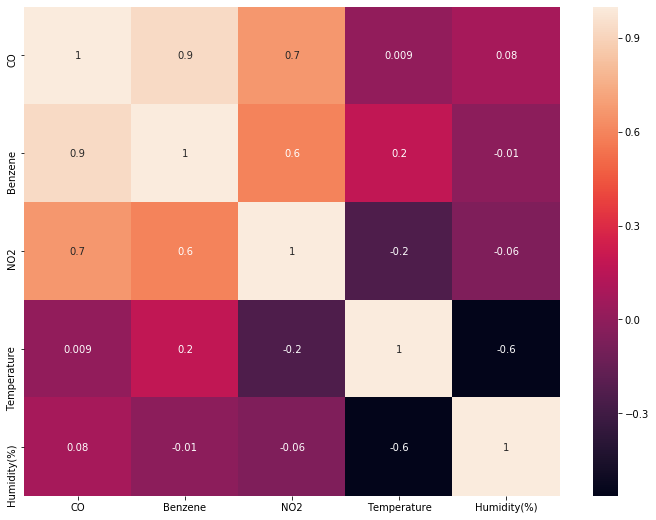

In [136]:
fig, ax = plt.subplots(figsize=(12,9))

sns.heatmap(air_pollution_2_final.corr(), annot = True, fmt='.1g', ax=ax)

3) Looking at the heatmap it is hard to visualize a correlation between CO and humidity and CO and Temperature. Only a slight positive correlation between both variables against the CO can be seen. To further investigate, a correlation matrix was plotted which shows that both variables have an extremely small positive correlation with CO.

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

C:\Users\Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


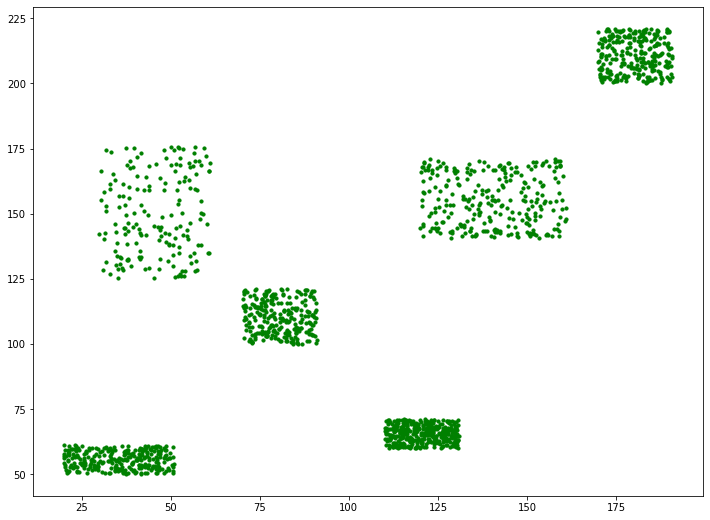

In [137]:
# Your code

air_pollution_2 = pd.read_csv(r'datasets/air_pollution_2.csv')

traffic_volume = air_pollution_2['Traffic_Volume'].values
particulate_matter = air_pollution_2['Particulate_Matter'].values

plt.rcParams['figure.figsize'] = (12, 9)
plt.scatter(traffic_volume, particulate_matter,c='green', s =10)
plt.show()

Explanation: The relationship between traffic_volume and particulate_matter can be seen by the clusters made in the scatterplot. We can see the data clusters where the majority of the points are seen. In total there are 6 clusters where most of the data points are clustered.

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

In [138]:
# Your code
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


air_pollution_sample_dropped =  air_pollution_sample.dropna(subset=['Traffic_Volume', 'Particulate_Matter'])

print("Dataframe after dropping nan values!")
print(air_pollution_sample_dropped.head())

traffic_volume = air_pollution_sample_dropped['Traffic_Volume'].values
particulate_matter = air_pollution_sample_dropped['Particulate_Matter'].values

air_pollution_data = np.array(list(zip(traffic_volume, particulate_matter)))

Dataframe after dropping nan values!
        Date      Time   CO  Benzene  NO2  Temperature  Humidity(%)  \
1   20.03.04  12:00:00  2.6     11.7  108         16.3         50.0   
2   15.04.04  19:00:00  7.3     33.7  158         17.4         47.8   
8   27.04.04  21:00:00  2.5     12.5  122         19.9         37.8   
13  15.03.04  10:00:00  5.8     26.6  157         17.4         45.6   
15  08.04.04  15:00:00  2.5     13.2  101         20.6         24.8   

    Traffic_Volume  Particulate_Matter  
1        34.322433           51.570678  
2       138.571275          158.841517  
8       183.267089          216.727269  
13       28.540181           54.965372  
15      159.044048          141.472679  


K-Means clustering using 4 clusters
K-Means clustering using 3 clusters
K-Means clustering using 6 clusters


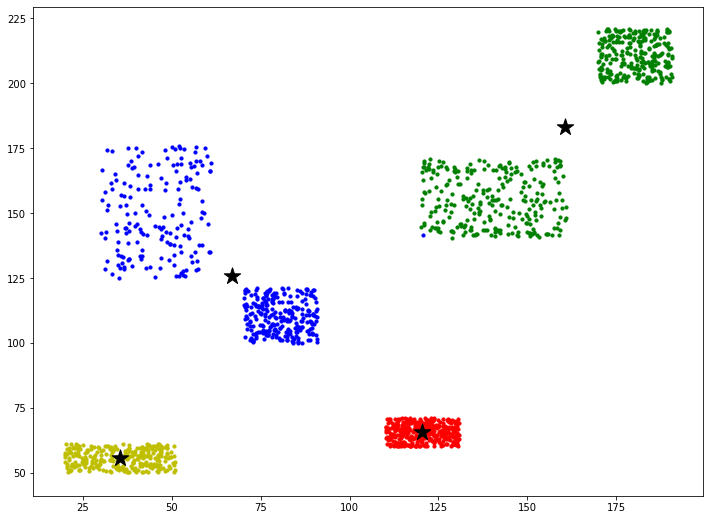

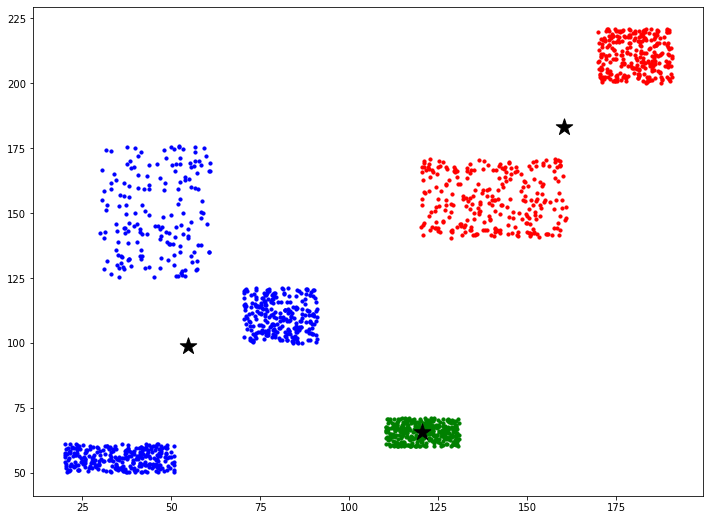

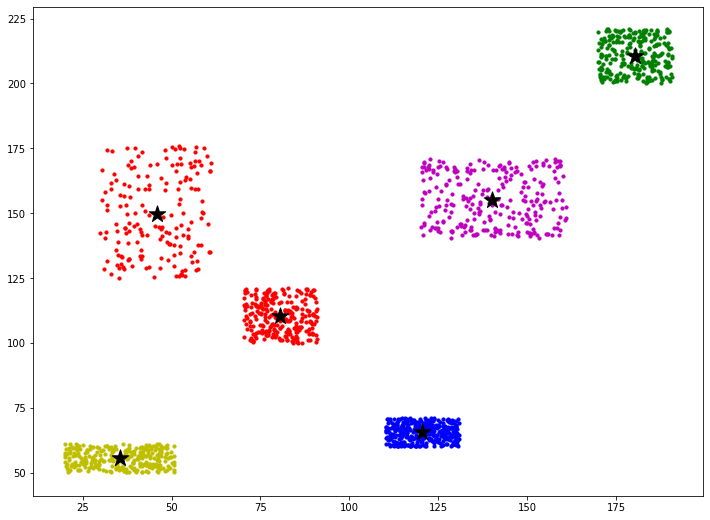

In [139]:
#Applying k-means
#----------------------------------------------------------------------------------------
print("K-Means clustering using 4 clusters")

colors =['black', 'purple', 'silver', 'olive', 'teal', 'aqua', 'lime', 'fuchsia','red', 'green', 'blue', 'yellow', 'maroon']

cluster_num = 4
kmeans = KMeans(cluster_num).fit(air_pollution_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#-----------------------------------------------------------------------------------------
print("K-Means clustering using 3 clusters")

cluster_num = 3
kmeans = KMeans(cluster_num).fit(air_pollution_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#--------------------------------------------------------------------------------------------
print("K-Means clustering using 6 clusters")

cluster_num = 6
kmeans = KMeans(cluster_num).fit(air_pollution_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')


(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

DBSCAN method with eps= 6 and min_samples= 10
DBSCAN method with eps= 4 and min_samples= 6
DBSCAN method with eps= 12 and min_samples= 8


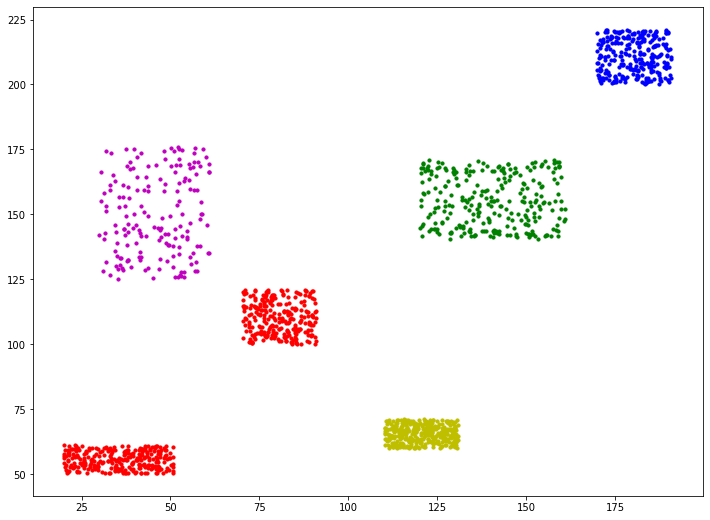

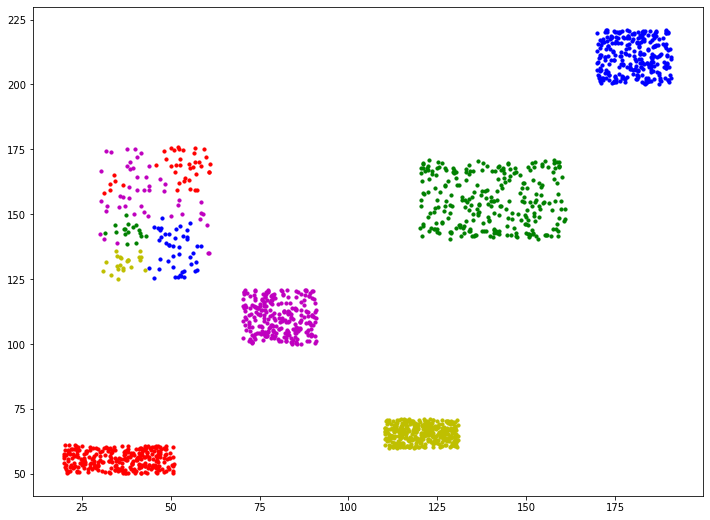

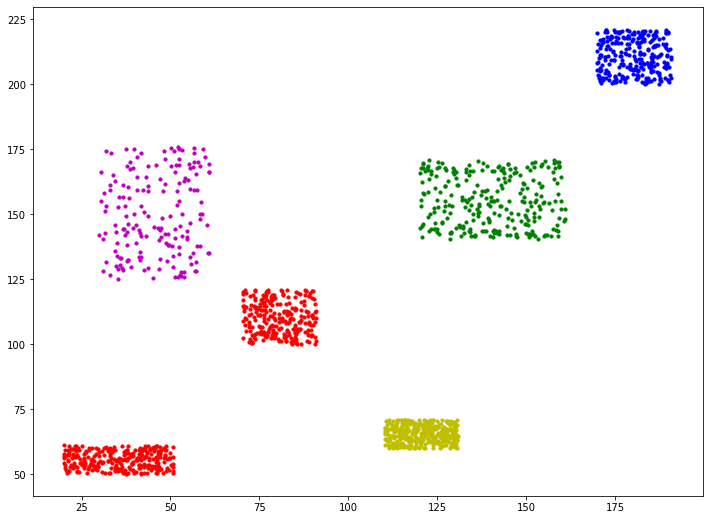

In [140]:
# Your code

#air_pollution_data = np.array(list(zip(traffic_volume, particulate_matter)))

#-----------------------------------------------------------------------------------
print("DBSCAN method with eps= 6 and min_samples= 10")

dbscan = DBSCAN(eps = 6, min_samples=10).fit(air_pollution_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])

#-----------------------------------------------------------------------------------
print("DBSCAN method with eps= 4 and min_samples= 6")

dbscan = DBSCAN(eps = 4, min_samples= 6).fit(air_pollution_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])

#-----------------------------------------------------------------------------------
print("DBSCAN method with eps= 12 and min_samples= 8")

dbscan = DBSCAN(eps = 12, min_samples=8).fit(air_pollution_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data[i] for i in range(len(air_pollution_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])


(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

## Explanation:

The k_means method seems more suitable for clustering this data as the data is naturally split between 6 clusters. After looking at the scatterplot it was clear that the data is divided in 6 clusters and k_means with k=6 would fit the data nicely. 

However, if we keep an eps value higher than five than DBSCAN is also a good fit for the data. 

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

In [141]:
# Your code

traffic_volume = air_pollution_sample_dropped['Traffic_Volume'].values
particulate_matter = air_pollution_sample_dropped['Particulate_Matter'].values

# seed random number generator
random.seed(1)

range_traffic_volume = np.ptp(traffic_volume)
range_particulate_matter = np.ptp(particulate_matter)

print('max for all features')
print(air_pollution_sample_dropped.max())
print()
print('min for all features')
print(air_pollution_sample_dropped.min())

noise_traffic_volume = np.empty(30)
noise_particulate_matter = np.empty(30)

for i in range(30):

    noise_traffic_volume[i] = random.randrange(20,190)
    noise_particulate_matter[i] = random.randrange(50,220)

    # noise_traffic_volume[i] = random.randrange() + range_traffic_volume
    # noise_particulate_matter[i] = random.randrange() + range_particulate_matter

traffic_volume_noise =  np.append(traffic_volume, noise_traffic_volume)
particulate_matter_noise = np.append(particulate_matter, noise_particulate_matter)

max for all features
Date                  31.03.04
Time                   9:00:00
CO                         8.1
Benzene                   40.3
NO2                        196
Temperature               32.8
Humidity(%)               85.2
Traffic_Volume         190.812
Particulate_Matter      220.98
dtype: object

min for all features
Date                  01.04.04
Time                   0:00:00
CO                        -200
Benzene                   -200
NO2                       -200
Temperature               -200
Humidity(%)               -200
Traffic_Volume         20.0078
Particulate_Matter     50.1725
dtype: object


C:\Users\Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


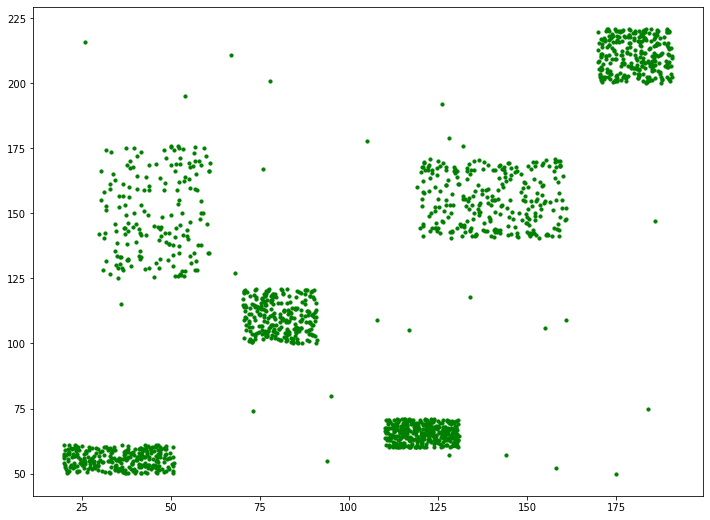

In [142]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.scatter(traffic_volume_noise, particulate_matter_noise, c='green', s =10)
plt.show()

k=6
k=12
k=3


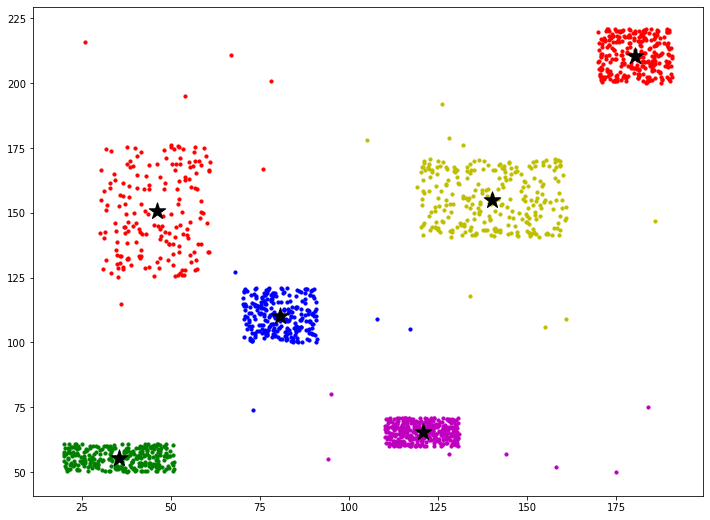

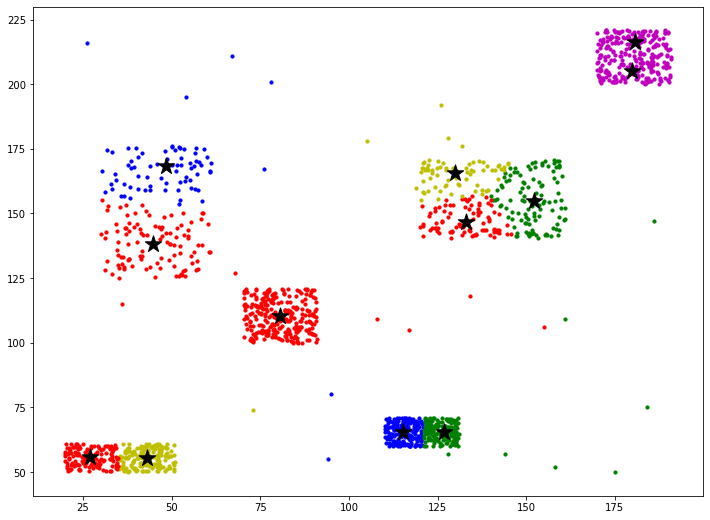

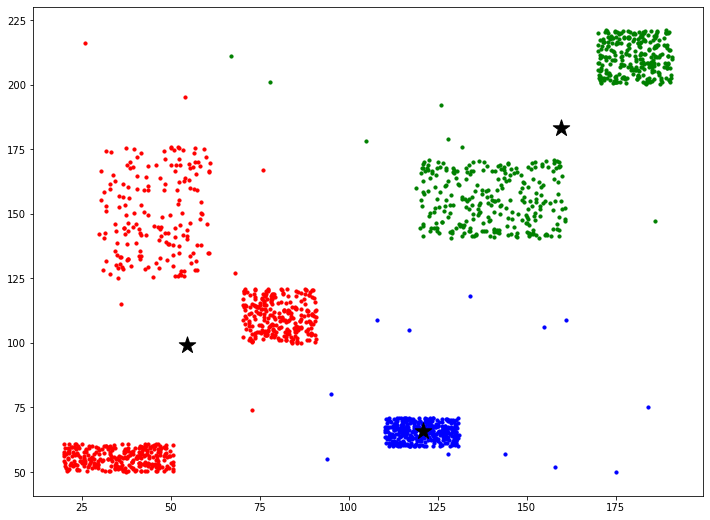

In [143]:
air_pollution_data_noise = np.array(list(zip(traffic_volume_noise, particulate_matter_noise)))

#----------------------------------------------------------------------------------------
print("k=6")
cluster_num = 6
kmeans = KMeans(cluster_num).fit(air_pollution_data_noise)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index%len(colors)])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#----------------------------------------------------------------------------------------
print("k=12")
cluster_num = 12
kmeans = KMeans(cluster_num).fit(air_pollution_data_noise)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index%len(colors)])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#----------------------------------------------------------------------------------------
print("k=3")
cluster_num = 3
kmeans = KMeans(cluster_num).fit(air_pollution_data_noise)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in range(cluster_num) :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index%len(colors)])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')


eps = 6, min_samples= 10
eps = 3, min_samples= 14
eps = 9, min_samples= 5


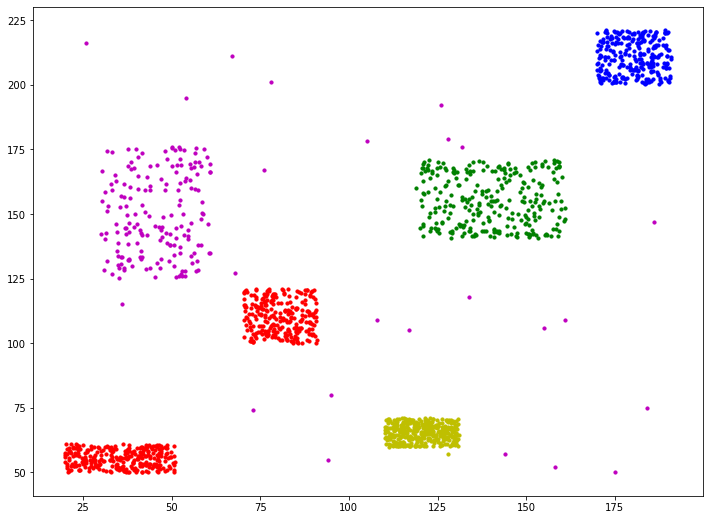

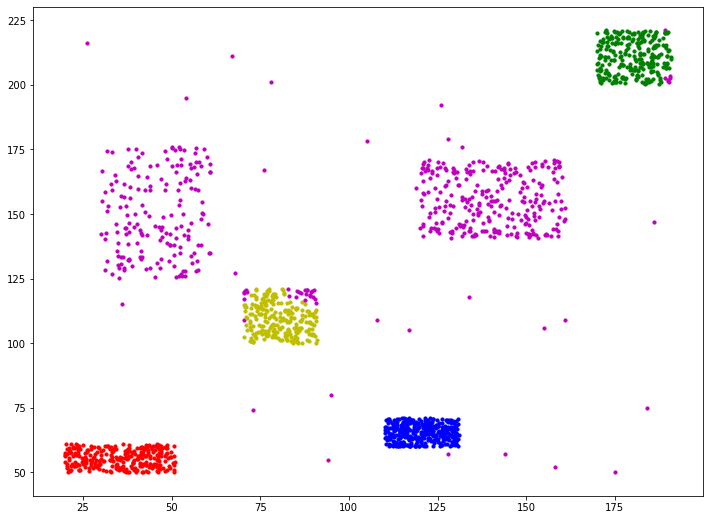

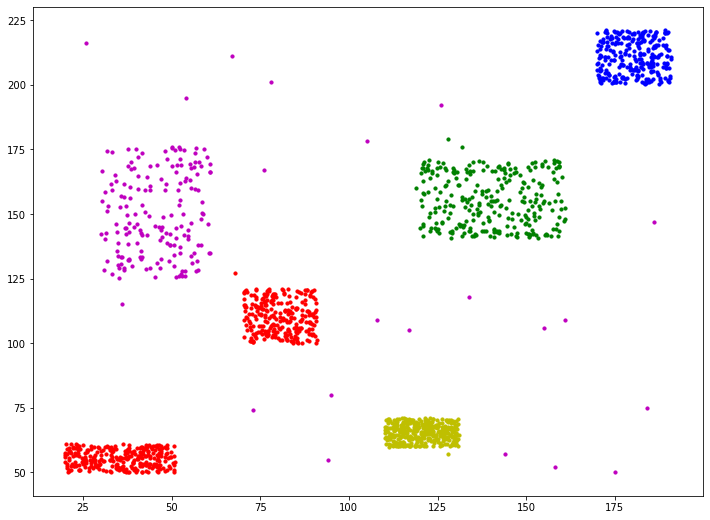

In [144]:
#-------------------------------------------------------------------------------------------
print('eps = 6, min_samples= 10')
dbscan = DBSCAN(eps = 6, min_samples=10).fit(air_pollution_data_noise)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])

#-------------------------------------------------------------------------------------------
print('eps = 3, min_samples= 14')
dbscan = DBSCAN(eps = 3, min_samples=14).fit(air_pollution_data_noise)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])

#-------------------------------------------------------------------------------------------
print('eps = 9, min_samples= 5')
dbscan = DBSCAN(eps = 9, min_samples=5).fit(air_pollution_data_noise)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()

fig, plots = plt.subplots(figsize=(12,9))
for cluster_index in cluster_indexs :
    sub_set = np.array([air_pollution_data_noise[i] for i in range(len(air_pollution_data_noise)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s=10, c = colors[cluster_index%len(colors)])


## Explanation:

After looking at the K-means plot and the DBSCAN plot it seems that DBSCAN performs better in noise as it considers the minimum samples and then detects whether the point lies closest to which point. This way the point is not always assigned to the closest cluster but to the group of points. We also do not need to state the number of clusters for this method. 

However, the k-means method also performed good when comparing with the scatter plot as it assigns the point to the cluster with the minimum distance. This way the noise always gets assigned to the closest cluster. BUt it is not always true that the point belongs to the closet cluster!

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [145]:
# Your code
def read_dataset(dataset):
    data = pd.read_csv(dataset, low_memory=False)
    return data

#Read dataset
applications = read_dataset("datasets/applications.csv")
print(applications.size)

#Defining a seed
applications_sample = applications.sample(frac=0.9,random_state=407536)
#print(type(applications_sample))

#Exporting CSV file
export_csv = applications_sample.to_csv(r'datasets/applications_2.csv', index = None, header=True)

2290050


(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [146]:
# Your code
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

# Read data from file applications.csv 
applications_data = []
with open("datasets/applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    
    for row in reader:
        applications_data.append([x for x in row if x != ''])
        
#print(applications_data)

# Using TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend
trans_encoder = TransactionEncoder()
trans_encoder_ary = trans_encoder.fit(applications_data).transform(applications_data)
data = pd.DataFrame(trans_encoder_ary, columns = trans_encoder.columns_)

# Applying Apriori algorithm
# Frequent itemset with support more than 0.4
frequent_itemsets = apriori(data, min_support = 0.5, use_colnames = True)
frequent_itemsets

support                                           itemsets
0   0.582102                                       (A_DECLINED)
1   1.000000                                (A_PARTLYSUBMITTED)
2   0.564018                                    (A_PREACCEPTED)
3   1.000000                                      (A_SUBMITTED)
4   0.564018                           (W_Completeren aanvraag)
5   0.582102                    (A_DECLINED, A_PARTLYSUBMITTED)
6   0.582102                          (A_DECLINED, A_SUBMITTED)
7   0.564018                 (A_PREACCEPTED, A_PARTLYSUBMITTED)
8   1.000000                   (A_PARTLYSUBMITTED, A_SUBMITTED)
9   0.564018        (W_Completeren aanvraag, A_PARTLYSUBMITTED)
10  0.564018                       (A_PREACCEPTED, A_SUBMITTED)
11  0.564018            (W_Completeren aanvraag, A_PREACCEPTED)
12  0.564018              (W_Completeren aanvraag, A_SUBMITTED)
13  0.582102       (A_DECLINED, A_PARTLYSUBMITTED, A_SUBMITTED)
14  0.564018    (A_PREACCEPTED, A_PARTLYSUBMITTED, A_SUBMITTED)
15  0.564018  (A_PREACCEPTED, W_Completeren aanvraag, A_PART...
16  0.564018  (W_Completeren aanvraag, A_PARTLYSUBMITTED, A_...
17  0.564018  (W_Completeren aanvraag, A_PREACCEPTED, A_SUBM...
18  0.564018  (A_PREACCEPTED, W_Completeren aanvraag, A_PART...

(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [147]:
# Your code
# Adding the column length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Frequent itemsets having more than 2 members and support more than 0.4
frequent_itemsets_filtered = frequent_itemsets.loc[ (frequent_itemsets['length'] > 2) & (frequent_itemsets['support'] >= 0.4) ]
frequent_itemsets_filtered

support                                           itemsets  length
13  0.582102       (A_DECLINED, A_PARTLYSUBMITTED, A_SUBMITTED)       3
14  0.564018    (A_PREACCEPTED, A_PARTLYSUBMITTED, A_SUBMITTED)       3
15  0.564018  (A_PREACCEPTED, W_Completeren aanvraag, A_PART...       3
16  0.564018  (W_Completeren aanvraag, A_PARTLYSUBMITTED, A_...       3
17  0.564018  (W_Completeren aanvraag, A_PREACCEPTED, A_SUBM...       3
18  0.564018  (A_PREACCEPTED, W_Completeren aanvraag, A_PART...       4

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [148]:
# Your code

min_confidence_rules =arule(frequent_itemsets, metric='confidence', min_threshold = 0.3)
filtered_rules = min_confidence_rules.loc[(min_confidence_rules['lift'] >= 1.2) ] 
filtered_rules[['support', 'confidence', 'lift']]


support  confidence      lift
12  0.564018         1.0  1.772994
13  0.564018         1.0  1.772994
29  0.564018         1.0  1.772994
30  0.564018         1.0  1.772994
31  0.564018         1.0  1.772994
32  0.564018         1.0  1.772994
41  0.564018         1.0  1.772994
42  0.564018         1.0  1.772994
43  0.564018         1.0  1.772994
44  0.564018         1.0  1.772994
48  0.564018         1.0  1.772994
49  0.564018         1.0  1.772994
51  0.564018         1.0  1.772994
52  0.564018         1.0  1.772994
53  0.564018         1.0  1.772994
54  0.564018         1.0  1.772994
56  0.564018         1.0  1.772994
57  0.564018         1.0  1.772994

## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [149]:
# Your code
from sklearn.pipeline import Pipeline
import csv
from sklearn.linear_model import SGDClassifier,LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from gensim.parsing.preprocessing import strip_punctuation,stem_text,remove_stopwords,preprocess_string
import multiprocessing
cores = multiprocessing.cpu_count()
data=[]
arr_target=[]

# Importing Test Data
with open("datasets/pg_test.csv", encoding="ISO-8859-1") as csvFile:
    reader = csv.reader(csvFile, delimiter=';')
    for row in reader:
        if len(row)==0 :
            continue
        target,row[0] = row[0].split("#")
        for r in row:
            data.append(r)
            arr_target.append(target)

test=pd.DataFrame({'data':data,'target':arr_target})
test.head(2)


data  target
0  "When you are tired of eating strawberries in ...  austen
1   only don ' t have a great set out . And , by ...  austen

In [150]:
data=[]
arr_target=[]

# Importing Train Data
with open("datasets/pg_train.csv", encoding="ISO-8859-1") as csvFile:
    reader = csv.reader(csvFile, delimiter=';')
    for row in reader:
        if len(row)==0 :
            continue
        target,row[0] = row[0].split("#")
        for r in row:
            data.append(r)
            arr_target.append(target)
train=pd.DataFrame({'data':data,'target':arr_target})
train.head(2)

data  target
0  [ Emma by Jane Austen 1816 ] VOLUME I CHAPTER ...  austen
1   and had lived nearly twenty - one years in th...  austen

In [151]:
# Training Model 1
bin_doc_term_text_clf = Pipeline([('vect', CountVectorizer(binary=True,preprocessor=(lambda x : remove_stopwords(stem_text((strip_punctuation(x.lower()))))))), ('clf-logistic', LogisticRegressionCV(max_iter=1000,n_jobs=cores))],verbose=True)
bin_doc_term_text_clf = bin_doc_term_text_clf.fit(train['data'], train['target'])

[Pipeline] .............. (step 1 of 2) Processing vect, total=   2.3s
[Pipeline] ...... (step 2 of 2) Processing clf-logistic, total=  12.1s


(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [152]:
# Your code

# Training Model 2
doc_count_matrix_text_clf = Pipeline([('vect', CountVectorizer(preprocessor=(lambda x : remove_stopwords(stem_text((strip_punctuation(x.lower()))))))), ('clf-logistic', LogisticRegressionCV(max_iter=1000,n_jobs=cores))],verbose=True)
doc_count_matrix_text_clf = doc_count_matrix_text_clf.fit(train['data'], train['target'])


[Pipeline] .............. (step 1 of 2) Processing vect, total=   2.4s
[Pipeline] ...... (step 2 of 2) Processing clf-logistic, total=  13.4s


(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [153]:
# Your code
# Training Model 3
tf_idf_text_clf = Pipeline([('vect', TfidfVectorizer(preprocessor=(lambda x : remove_stopwords(stem_text((strip_punctuation(x.lower()))))))), ('clf-logistic', LogisticRegressionCV(max_iter=1000,n_jobs=cores))],verbose=True)
tf_idf_text_clf = tf_idf_text_clf.fit(train['data'], train['target'])


[Pipeline] .............. (step 1 of 2) Processing vect, total=   2.4s
[Pipeline] ...... (step 2 of 2) Processing clf-logistic, total=  13.3s


(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [154]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends,padded_everygram_pipeline
from nltk.lm.preprocessing import flatten
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize,sent_tokenize 
from collections import Counter, defaultdict

In [155]:
# Your code

import gensim
from gensim.models import Doc2Vec
from tqdm import tqdm

train_tagged = []
test_tagged = []

# Preprocessing
from gensim.parsing.preprocessing import strip_punctuation,stem_text,remove_stopwords,preprocess_string
CUSTOM_FILTERS = [lambda x: x.lower(),stem_text, strip_punctuation,remove_stopwords]

for i in range (0, len(train['data'])):
    train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=preprocess_string(train.data[i],CUSTOM_FILTERS), tags=[train.target[i]]))

for i in range (0, len(test['data'])):
    test_tagged.append(gensim.models.doc2vec.TaggedDocument(words=preprocess_string(test.data[i],CUSTOM_FILTERS), tags=[test.target[i]]))

print(repr(train_tagged[0]))


TaggedDocument(words=['emma', 'jane', 'austen', '1816', 'volum', 'chapter', 'emma', 'woodhous', 'handsom', 'clever', 'rich', 'comfort', 'home', 'happi', 'disposit', 'unit', 'best', 'bless', 'exist'], tags=['austen'])


In [156]:

import gensim

# Building the vocabulary

doc2vec_model = Doc2Vec(dm=0, vector_size=300,min_count=2, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(train_tagged)])


100%|███████████████████████████████████████████████████████████████████████| 10120/10120 [00:00<00:00, 2527772.54it/s]


In [157]:
# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=5)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha
    

100%|███████████████████████████████████████████████████████████████████████| 10120/10120 [00:00<00:00, 5060970.13it/s]


In [158]:
# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets

# Translating docs into vectors for training and test set
X_train, y_train = vec_for_learning(doc2vec_model, train_tagged)
X_test, y_test = vec_for_learning(doc2vec_model, test_tagged)



In [159]:
# Training a classification model 4
from sklearn.linear_model import LogisticRegression

doc2vec_log_reg = LogisticRegression(max_iter=1000,n_jobs=cores)
doc2vec_log_reg=doc2vec_log_reg.fit(X_train, y_train)


(e) Predict the classification with the four models on the test data.

In [160]:
# Your code

# Using a binary document-term matrix - Model 1
bin_doc_term_text_clf_predicted = bin_doc_term_text_clf.predict(test['data'])
# np.mean(bin_doc_term_text_clf_predicted == test['target'])

# Using a document-term matrix of counts - Model 2
doc_count_matrix_text_clf_predicted = doc_count_matrix_text_clf.predict(test['data'])
# np.mean(doc_count_matrix_text_clf_predicted == test['target'])

#Using TF-IDF - Model 3
tf_idf_text_clf_predicted = tf_idf_text_clf.predict(test['data'])
# np.mean(tf_idf_text_clf_predicted == test['target'])

# Using Doc2Vec Model - Model 4
y_pred = doc2vec_log_reg.predict(X_test)



(f) Obtain confusion matrices for the four different models.


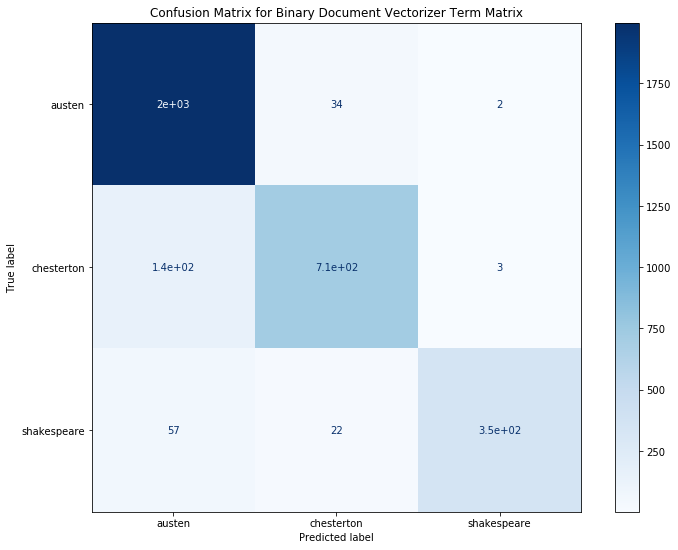

In [161]:
# Your code
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

fig, (ax) = plt.subplots(figsize=(12,9))

disp = plot_confusion_matrix(bin_doc_term_text_clf, test['data'], test['target'],cmap=plt.cm.Blues,ax=ax)
disp.ax_.set_title("Confusion Matrix for Binary Document Vectorizer Term Matrix")


# print(disp.confusion_matrix)
plt.show()

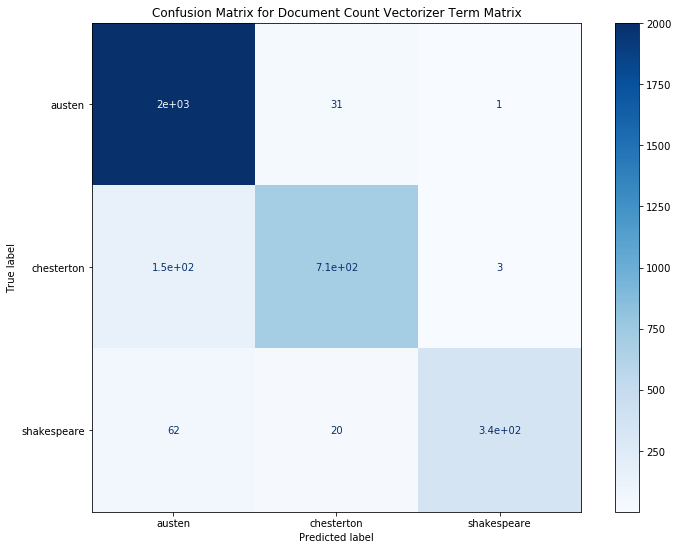

In [162]:
fig, (ax) = plt.subplots(figsize=(12,9))
disp = plot_confusion_matrix(doc_count_matrix_text_clf, test['data'], test['target'],cmap=plt.cm.Blues,ax=ax)
disp.ax_.set_title("Confusion Matrix for Document Count Vectorizer Term Matrix")
plt.show()

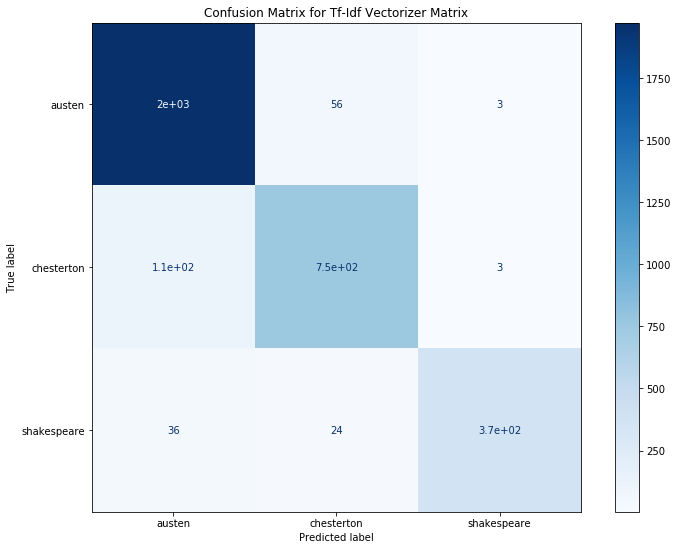

In [163]:
fig, (ax) = plt.subplots(figsize=(12,9))
disp = plot_confusion_matrix(tf_idf_text_clf, test['data'], test['target'],cmap=plt.cm.Blues,ax=ax)
disp.ax_.set_title("Confusion Matrix for Tf-Idf Vectorizer Matrix")
plt.show()


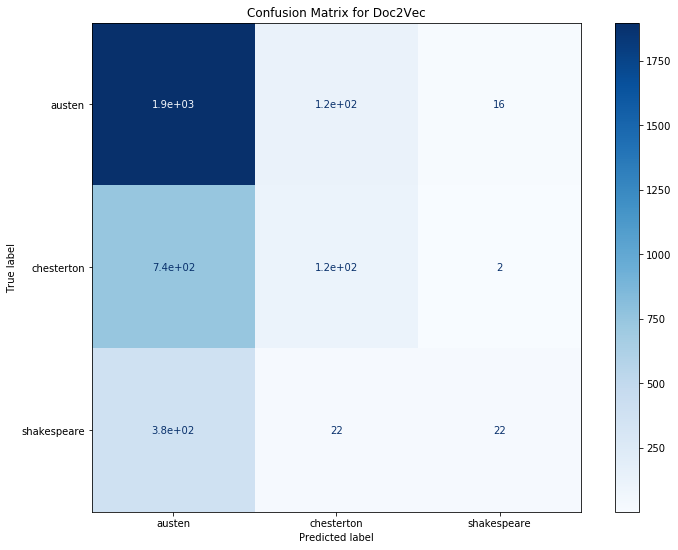

In [164]:
fig, (ax) = plt.subplots(figsize=(12,9))
disp = plot_confusion_matrix(doc2vec_log_reg, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
disp.ax_.set_title("Confusion Matrix for Doc2Vec")
plt.show()

(g) Obtain accuracy and f1-score for the four different models.


In [165]:
# Your code
# Classification performance metrics
from sklearn.metrics import accuracy_score, f1_score


print('\nMetrics - Model 1')
print('Testing accuracy %s' % accuracy_score(test['target'], bin_doc_term_text_clf_predicted))
print('Testing F1 score: {}'.format(f1_score(test['target'], bin_doc_term_text_clf_predicted, average='weighted')))

print('\nMetrics - Model 2')
print('Testing accuracy %s' % accuracy_score(test['target'], doc_count_matrix_text_clf_predicted))
print('Testing F1 score: {}'.format(f1_score(test['target'], doc_count_matrix_text_clf_predicted, average='weighted')))

print('\nMetrics - Model 3')
print('Testing accuracy %s' % accuracy_score(test['target'], tf_idf_text_clf_predicted))
print('Testing F1 score: {}'.format(f1_score(test['target'], tf_idf_text_clf_predicted, average='weighted')))

print('\nMetrics - Model 4')
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))


Metrics - Model 1
Testing accuracy 0.9211318482841662
Testing F1 score: 0.9196181092654713

Metrics - Model 2
Testing accuracy 0.9202287778446718
Testing F1 score: 0.9185802208058624

Metrics - Model 3
Testing accuracy 0.930162552679109
Testing F1 score: 0.9295705220401994

Metrics - Model 4
Testing accuracy 0.6125827814569537
Testing F1 score: 0.5251607561177254


(h) Briefly comment on the quality of the predictions for the four models.

## Explanation:
Overall, BoW perform better and predicts with higher accuracy on the dataset which predicts the author name where order doesn't helps. Between the three model that uses variants of document-term matrix, tf-idf performs better of the three which better summarizes each row as vector of width equal to unique word count. Doc2Vec doesn't perform well due to the reasons that it works well on lots of doucment data, of dozens of thousands of words each.

(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [166]:
# Your code

# import nltk
# nltk.download('punkt')

test_austen=test[test['target']=='austen']
train_austen=train[train['target']=='austen']

test_chesterton=test[test['target']=='chesterton']
train_chesterton=train[train['target']=='chesterton']

data_austen = train_austen.append(test_austen,ignore_index=True, verify_integrity=True )
data_chesterton = train_chesterton.append(test_chesterton,ignore_index=True, verify_integrity=True )

CUSTOM_FILTERS = [lambda x: x.lower(), strip_punctuation]
for i in range (0, len(data_austen.data)):
    data_austen.data[i]=preprocess_string(data_austen.data[i],CUSTOM_FILTERS)

for i in range (0, len(data_chesterton.data)):
    data_chesterton.data[i]=preprocess_string(data_chesterton.data[i],CUSTOM_FILTERS)

tokenized_list_austen= data_austen.data
tokenized_list_chesterton= data_chesterton.data


In [167]:
n = 2
train_data_austen, padded_sents_austen = padded_everygram_pipeline(n,tokenized_list_austen)
train_data_chesterton, padded_sents_chesterton = padded_everygram_pipeline(n,tokenized_list_chesterton)



In [168]:
from nltk.lm import MLE
model_austen = MLE(n) 

model_austen.fit(train_data_austen, padded_sents_austen)
print(model_austen.vocab)
print(len(model_austen.vocab))

model_chesterton = MLE(n) 
print(len(model_chesterton.vocab))
model_chesterton.fit(train_data_chesterton, padded_sents_chesterton)
print(model_chesterton.vocab)
print(len(model_chesterton.vocab))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 10383 items>
10383
0
<Vocabulary with cutoff=1 unk_label='<UNK>' and 13240 items>
13240


(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [169]:
# 'She'
# 'They'
# 'It'

from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenizer = TreebankWordDetokenizer().detokenize

def custom_generate_sent(model, num_words, text_seed):
    content = []
    # Prepending seed text
    content.append(text_seed[0])
    for token in model.generate(num_words, text_seed=text_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenizer(content)
            

print('\n Austen')
print(custom_generate_sent(model_austen, num_words=15,text_seed=['She']))
print(custom_generate_sent(model_austen, num_words=15,text_seed=['They']))
print(custom_generate_sent(model_austen, num_words=15,text_seed=['It']))

print('\n Chesterton')
print( custom_generate_sent(model_chesterton, num_words=15,text_seed=['She']))
print(custom_generate_sent(model_chesterton, num_words=15,text_seed=['They']))
print(custom_generate_sent(model_chesterton, num_words=15,text_seed=['It']))




 Austen
She likely to marry anne was nearly twenty thousand pounds which had spent anywhere i could
They saying a very sickly and while her with rich
It figure and grounds mr knightley i believe i thought edward she did not a source

 Chesterton
She the wheel grew nearer i hate of land
They out of an improbable that they were in this out of macian stepped into his
It they saw her feet around him and the power evan no clothes were much larger


(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [170]:
# Your code
n = 3
train_data_austen, padded_sents_austen = padded_everygram_pipeline(n,tokenized_list_austen)
train_data_chesterton, padded_sents_chesterton = padded_everygram_pipeline(n,tokenized_list_chesterton)


from nltk.lm import MLE
model_austen = MLE(n) 
print(len(model_austen.vocab))
model_austen.fit(train_data_austen, padded_sents_austen)
print(len(model_austen.vocab))

model_chesterton = MLE(n) 
print(len(model_chesterton.vocab))
model_chesterton.fit(train_data_chesterton, padded_sents_chesterton)
print(len(model_chesterton.vocab))

0
10383
0
13240


(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [171]:
# Your code

print('\n Austen')
print( custom_generate_sent(model_austen, num_words=15,text_seed=['She']))
print(custom_generate_sent(model_austen, num_words=15,text_seed=['They']))
print(custom_generate_sent(model_austen, num_words=15,text_seed=['It']))

print('\n Chesterton')
print(custom_generate_sent(model_chesterton, num_words=15,text_seed=['She']))
print(custom_generate_sent(model_chesterton, num_words=15,text_seed=['They']))
print(custom_generate_sent(model_chesterton, num_words=15,text_seed=['It']))


 Austen
She not great coxcombs
They sort of penetration or suspicion was a dislike of mrs churchill lived i assure you
It shall we see nothing of respectability of harmony of the number of privy councillors was

 Chesterton
She noah in the tube this he had a notion answered father brown s smooth brow
They in his seat and muttered in his capacity for suggesting fine shades and picking perfect
It will swear not to understand them merely owing to the dark man dropping back a


(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

## Explanation:
The model with trigrams performs better since it has more context and also as per the markov assumption that the longer the context it has; the better the predicatabiliy, which in terms of trigram is P(X|Y,Z) , which is better as compared to P(X|Y) in Bigrams. This can also be seen in the senteces above that the one with trigrams are more meaningful and contextual

## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [172]:
import pm4py
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.statistics.traces.log import case_statistics
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
from pm4py.algo.conformance.alignments import factory as align_factory
from pm4py.objects.petri import semantics
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory

In [173]:
# Your code

#Importing the log file
log = xes_importer.import_log(r'datasets/event_log.xes')

# Traces of the log
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

print('Least frequent variant: \n' + str(variants_count[len(variants_count)-1]))
print('\n Most frequent variant: \n' + str(variants_count[0]))

Least frequent variant: 
{'variant': 'Assign seriousness,Assign seriousness,Assign seriousness,Assign seriousness,Resolve ticket,Take in charge ticket,Resolve ticket,Closed', 'count': 1}

 Most frequent variant: 
{'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'count': 2366}


(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [174]:
# Your code

# 1% of the log
count = 0
for i in range(len(variants_count)): 
    count = count + variants_count[i]['count']
one_percent_traces = count *0.01
#print(one_percent_traces)

# Fetching variants from log
variants = variants_filter.get_variants(log)

# Filtering variants
filtered_variants = {}
for j in variants_count:
    if(j['count'] >= one_percent_traces):
        filtered_variants[j['variant']] = variants[j['variant']]

# Creating new filtered event log
filtered_log = variants_filter.apply(log, filtered_variants)
#print(filtered_log)

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [175]:
# Your code

# Applying Inductive miner algorithm on the newly created filtered log
#tree = inductive_miner.apply_tree(filtered_log)
#gviz_tree = pt_vis_factory.apply(tree)
#pt_vis_factory.view(gviz_tree)

net, initial_marking, final_marking = inductive_miner.apply(filtered_log)

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [176]:
# Your code

# Performing token replay conformance on newly discovered model and the original event log
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])
    
#Checking whether the model fits by calculating the false traces
total_number_traces = len(token_replay_result)
trace_is_fit_false_count = 0
for i in token_replay_result:
    #print(i['transitions_with_problems'])
    if i['trace_is_fit']==False:
        trace_is_fit_false_count = trace_is_fit_false_count+1
        
print("\nTotal number of traces: "+str(len(token_replay_result)))
print("Traces that does not fit in model: "+str(trace_is_fit_false_count))
print("Percentage of traces that does not fit in model: "+str((trace_is_fit_false_count/total_number_traces) * 100))

{'trace_is_fit': False, 'trace_fitness': 0.9375, 'activated_transitions': [skip_1, init_loop_2, Assign seriousness, skip_5, init_loop_6, tauSplit_8, Take in charge ticket, Take in charge ticket, init_loop_10, Resolve ticket, skip_13, tauJoin_9, skip_16, Closed], 'reached_marking': ['p_12:1', 'sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [Take in charge ticket], 'missing_tokens': 1, 'consumed_tokens': 16, 'remaining_tokens': 1, 'produced_tokens': 16}

Total number of traces: 4580
Traces that does not fit in model: 1591
Percentage of traces that does not fit in model: 34.737991266375545


In [177]:
# Checking Petri net properties of model I
transitions = semantics.enabled_transitions(net, initial_marking)
places = net.places
transitions = net.transitions
arcs = net.arcs
place_count = 0
for k in places:
    place_count = place_count+1
    
transitions_count = 0
for h in transitions:
    transitions_count = transitions_count+1
    
arcs_count = 0
for h in arcs:
    arcs_count = arcs_count+1
print("Places in first model: " +str(place_count))
print("Transitions in first model: " +str(transitions_count))
print("Arcs in first model: " +str(arcs_count))

Places in first model: 18
Transitions in first model: 22
Arcs in first model: 46


Explanation:No, it can be seen that we have traces which do not fit in model from 'trace_is_fit_false_count', therefore, we can conclude that the process model does not fit the log.

(e) Calculate the fitness of the model in (c).

In [178]:
# Your code

# Computing log fitness
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking, variant="token_replay")
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 65.04366812227074, 'average_trace_fitness': 0.9712962145948477, 'log_fitness': 0.970673957266246}


(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation: Yes there are deviations between the process model and event log. The deviations can be seen in transitions_with_problems in token_based_replay_factory application which are [Closed], [Resolve SW anomaly, Closed], [Require upgrade, Closed], [Take in charge ticket, Resolve ticket],[Require upgrade], [RESOLVED]. The reason of this deviations can be seen in alignments according to which for couples where the second element is »,it corresponds to a replay move in the trace that is not mimicked in model. This move is unfit and signals a deviation between the trace and the model.

In [179]:
# Checking deviation in model
alignments = align_factory.apply_log(log, net, initial_marking, final_marking)
print(alignments)

[{'alignment': [('>>', None), ('>>', None), ('Assign seriousness', 'Assign seriousness'), ('Take in charge ticket', '>>'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Take in charge ticket', 'Take in charge ticket'), ('Resolve ticket', 'Resolve ticket'), ('>>', None), ('>>', None), ('>>', None), ('Closed', 'Closed')], 'cost': 10009, 'visited_states': 14, 'queued_states': 42, 'traversed_arcs': 42, 'fitness': 0.8571428571428572}, {'alignment': [('>>', None), ('>>', None), ('Assign seriousness', 'Assign seriousness'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Take in charge ticket', 'Take in charge ticket'), ('Resolve ticket', 'Resolve ticket'), ('>>', None), ('>>', None), ('>>', None), ('Closed', 'Closed')], 'cost': 9, 'visited_states': 13, 'queued_states': 39, 'traversed_arcs': 39, 'fitness': 1}, {'alignment': [('>>', None), ('>>', None), ('Assign seriousness', 'Assign seriousness'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Take in charge t

(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [180]:
# Your code

# Removing two most frequent variants from the list, as our list is sorted we can remove the first two variants
print(variants_count[:2])

# Taking the two most frequent variants
name_variants = [variant['variant'] for variant in variants_count]
print("\n",name_variants[:2],"\n")

if len(name_variants) >= 2:
    removed_most_frequent_variants =  variants_filter.apply(log,name_variants[:2],parameters={"positive": False})
#print(removed_most_frequent_variants)

# Applying Inductive miner algorithm on the newly created filtered log

#tree = inductive_miner.apply_tree(removed_most_frequent_variants)
#gviz_tree = pt_vis_factory.apply(tree)
#pt_vis_factory.view(gviz_tree)

net, initial_marking, final_marking = inductive_miner.apply(removed_most_frequent_variants)

[{'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'count': 2366}, {'variant': 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed', 'count': 552}]

 ['Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed'] 



(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [181]:
# Your code

# Performing token replay conformance on newly discovered model and the original event log
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])

#Checking whether the model fits by calculating the false traces
total_number_traces = len(token_replay_result)
trace_is_fit_false_count = 0
for i in token_replay_result:
    if i['trace_is_fit']==False:
        trace_is_fit_false_count = trace_is_fit_false_count+1 
        
print("\nTotal number of traces: "+str(len(token_replay_result)))
print("Traces that does not fit in model: "+str(trace_is_fit_false_count))
print("Percentage of traces that does not fit in model: "+str((trace_is_fit_false_count/total_number_traces) * 100))

{'trace_is_fit': True, 'trace_fitness': 0.967741935483871, 'activated_transitions': [skip_2, init_loop_3, skip_5, init_loop_6, tauSplit_8, skip_14, init_loop_15, Assign seriousness, init_loop_10, Take in charge ticket, skip_12, loop_11, Take in charge ticket, skip_17, loop_16, Resolve ticket, skip_13, skip_18, tauJoin_9, skip_24, skip_26, skip_27, skip_28, skip_34, tauSplit_35, init_loop_37, Closed, skip_40], 'reached_marking': ['p_33:1', 'p_36:1'], 'enabled_transitions_in_marking': {VERIFIED}, 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 29, 'remaining_tokens': 2, 'produced_tokens': 31}

Total number of traces: 4580
Traces that does not fit in model: 376
Percentage of traces that does not fit in model: 8.209606986899564


In [182]:
# Checking Petri net properties of model II
transitions = semantics.enabled_transitions(net, initial_marking)
places = net.places
transitions = net.transitions
arcs = net.arcs
place_count = 0
for k in places:
    place_count = place_count+1
    
transitions_count = 0
for h in transitions:
    transitions_count = transitions_count+1
    
arcs_count = 0
for h in arcs:
    arcs_count = arcs_count+1
print("Places in second model: " +str(place_count))
print("Transitions in second model: " +str(transitions_count))
print("Arcs in second model: " +str(arcs_count))

Places in second model: 40
Transitions in second model: 58
Arcs in second model: 120


Explanation:No, it can be seen that we have traces which do not fit in model from 'trace_is_fit_false_count', therefore, we can conclude that the process model does not fit the log.

(i) Calculate the fitness of the model in (g).

In [183]:
# Your code

# Calculating fitness
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking, variant= "token_replay")
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 0.2183406113537118, 'average_trace_fitness': 0.9605770305521291, 'log_fitness': 0.9630951715435623}


(j) Are there any deviations in the process model? If so, where and why?

Explanation:Yes there are deviations between the process model and event log. The deviations can be seen in transitions_with_problems in token_based_replay_factory application which are [Closed], [Resolve SW anomaly, Closed], [Require upgrade, Closed], [Take in charge ticket, Resolve ticket],[Require upgrade], [RESOLVED], [DUPLICATE]. The reason of this deviations can be seen in alignments according to which for couples where the second element is »,it corresponds to a replay move in the trace that is not mimicked in model. This move is unfit and signals a deviation between the trace and the model.

In [184]:
# Checking deviation in model
alignments = align_factory.apply_log(log, net, initial_marking, final_marking)
print(alignments)

[{'alignment': [('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Assign seriousness', 'Assign seriousness'), ('>>', None), ('>>', None), ('Take in charge ticket', 'Take in charge ticket'), ('>>', None), ('>>', None), ('Take in charge ticket', 'Take in charge ticket'), ('>>', None), ('Resolve ticket', 'Resolve ticket'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Closed', '>>'), ('>>', None)], 'cost': 10022, 'visited_states': 131, 'queued_states': 305, 'traversed_arcs': 423, 'fitness': 0.8}, {'alignment': [('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('Assign seriousness', 'Assign seriousness'), ('>>', None), ('>>', None), ('Take in charge ticket', 'Take in charge ticket'), ('>>', None), ('Resolve ticket', 'Resolve ticket'), ('>>', None), ('>>', None), ('>>', None), ('>>', None), ('>>', N

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


In [185]:
# Your code

# Applying Inductive miner algorithm 

#tree_original = inductive_miner.apply_tree(log)
#gviz_tree_original = pt_vis_factory.apply(tree_original)
#pt_vis_factory.view(gviz_tree_original)

net_orignial, initial_marking_orignial, final_marking_orignial = inductive_miner.apply(log)

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [186]:
# Your code

# Performing token replay conformance on newly discovered model and the original event log
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
print(token_replay_result[0])

# Calculating fitness
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking, variant= "token_replay")
print("\n")
print(fitness_tokenbasedreplay)

#Checking whether the model fits by calculating the false traces
total_number_traces = len(token_replay_result)
trace_is_fit_false_count = 0
for i in token_replay_result:
    if i['trace_is_fit']==False:
        trace_is_fit_false_count = trace_is_fit_false_count+1 
        
print("\nTotal number of traces: "+str(len(token_replay_result)))
print("Traces that does not fit in model: "+str(trace_is_fit_false_count))
print("Percentage of traces that does not fit in model: "+str((trace_is_fit_false_count/total_number_traces) * 100))

{'trace_is_fit': True, 'trace_fitness': 0.967741935483871, 'activated_transitions': [skip_2, init_loop_3, skip_5, init_loop_6, tauSplit_8, skip_14, init_loop_15, Assign seriousness, init_loop_10, Take in charge ticket, skip_12, loop_11, Take in charge ticket, skip_17, loop_16, Resolve ticket, skip_13, skip_18, tauJoin_9, skip_24, skip_26, skip_27, skip_28, skip_34, tauSplit_35, init_loop_37, Closed, skip_40], 'reached_marking': ['p_33:1', 'p_36:1'], 'enabled_transitions_in_marking': {VERIFIED}, 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 29, 'remaining_tokens': 2, 'produced_tokens': 31}


{'perc_fit_traces': 0.2183406113537118, 'average_trace_fitness': 0.9605770305521291, 'log_fitness': 0.9630951715435623}

Total number of traces: 4580
Traces that does not fit in model: 376
Percentage of traces that does not fit in model: 8.209606986899564


In [187]:
# Checking Petri net properties of model III
transitions = semantics.enabled_transitions(net, initial_marking)
places = net.places
transitions = net.transitions
arcs = net.arcs
place_count = 0
for k in places:
    place_count = place_count+1
    
transitions_count = 0
for h in transitions:
    transitions_count = transitions_count+1
    
arcs_count = 0
for h in arcs:
    arcs_count = arcs_count+1
print("Places in third model: " +str(place_count))
print("Transitions in third model: " +str(transitions_count))
print("Arcs in third model: " +str(arcs_count))

Places in third model: 40
Transitions in third model: 58
Arcs in third model: 120


Explanation:No, it can be seen that we have traces which do not fit in model from 'trace_is_fit_false_count', therefore, we can conclude that the process model does not fit the log.

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation: We can check the differences of three discovered models by its petri net properties 
First model has 18 places, 22 transitions and 46 arcs.
Second model has 40 places, 58 transitions and 120 arcs.
Third model has 40 places, 58 transitions and 120 arcs.

The second and third model have the highest percentage of fitted traces. The first model is definitely not best fit because by eliminating variants that are less than 1% we have decreased the number of traces to great amount. Whereas, the second and third model have a lot of data, in specific the third model and there may be a chance of overfitting. But, according to Conformance Checking results second and third model are best fitted to the original log. 

(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

Model with frequency information 



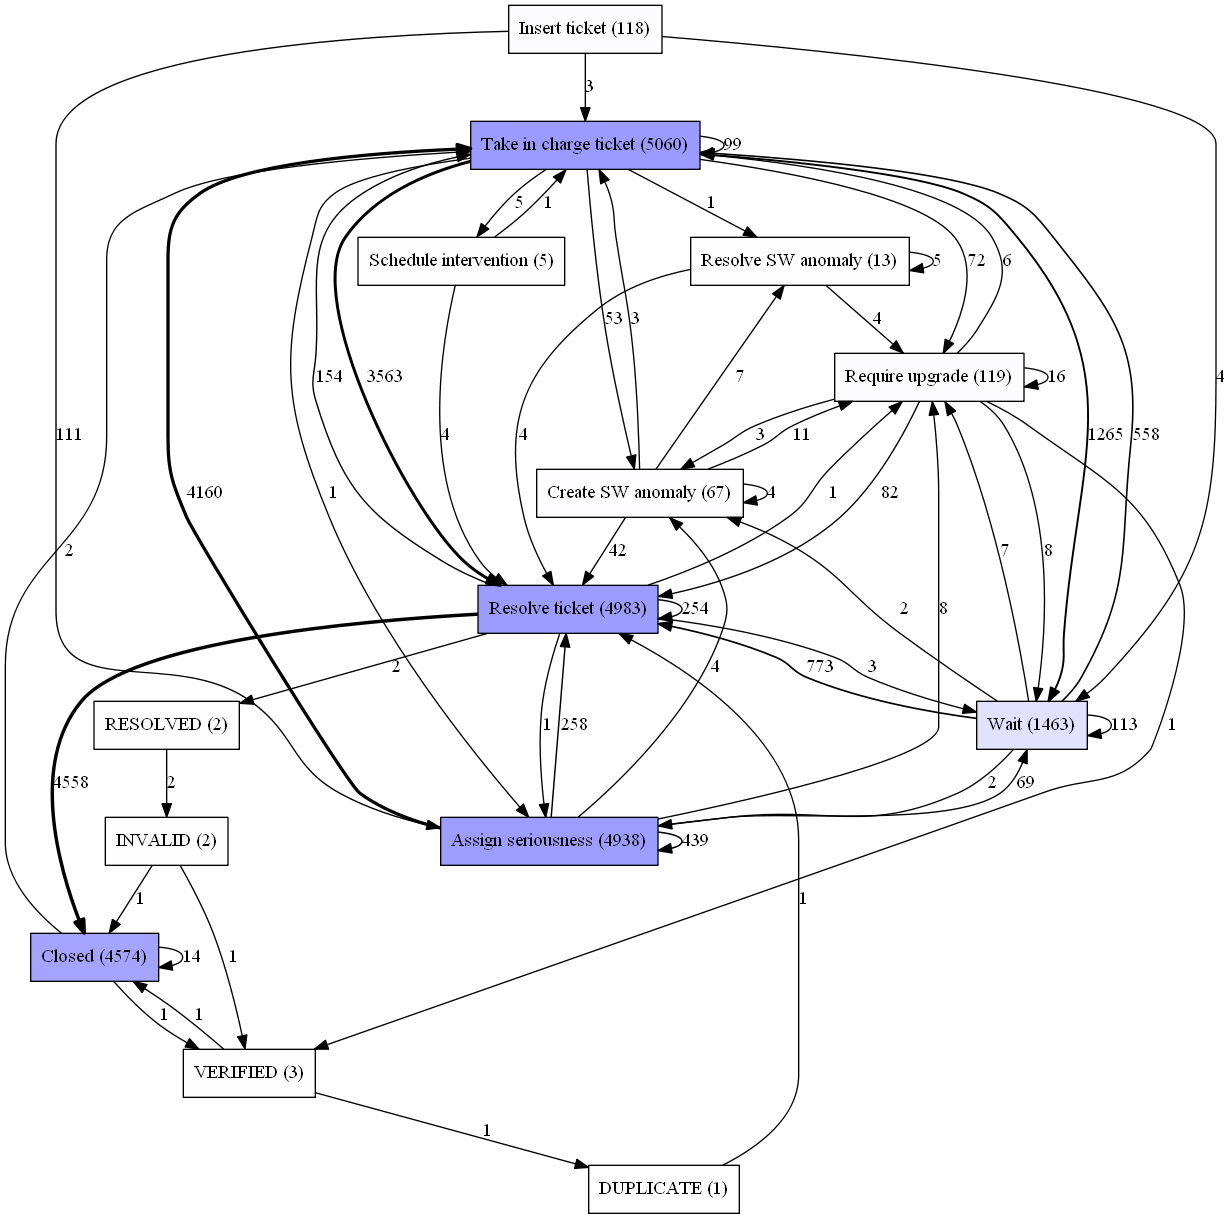

Model with performance information 



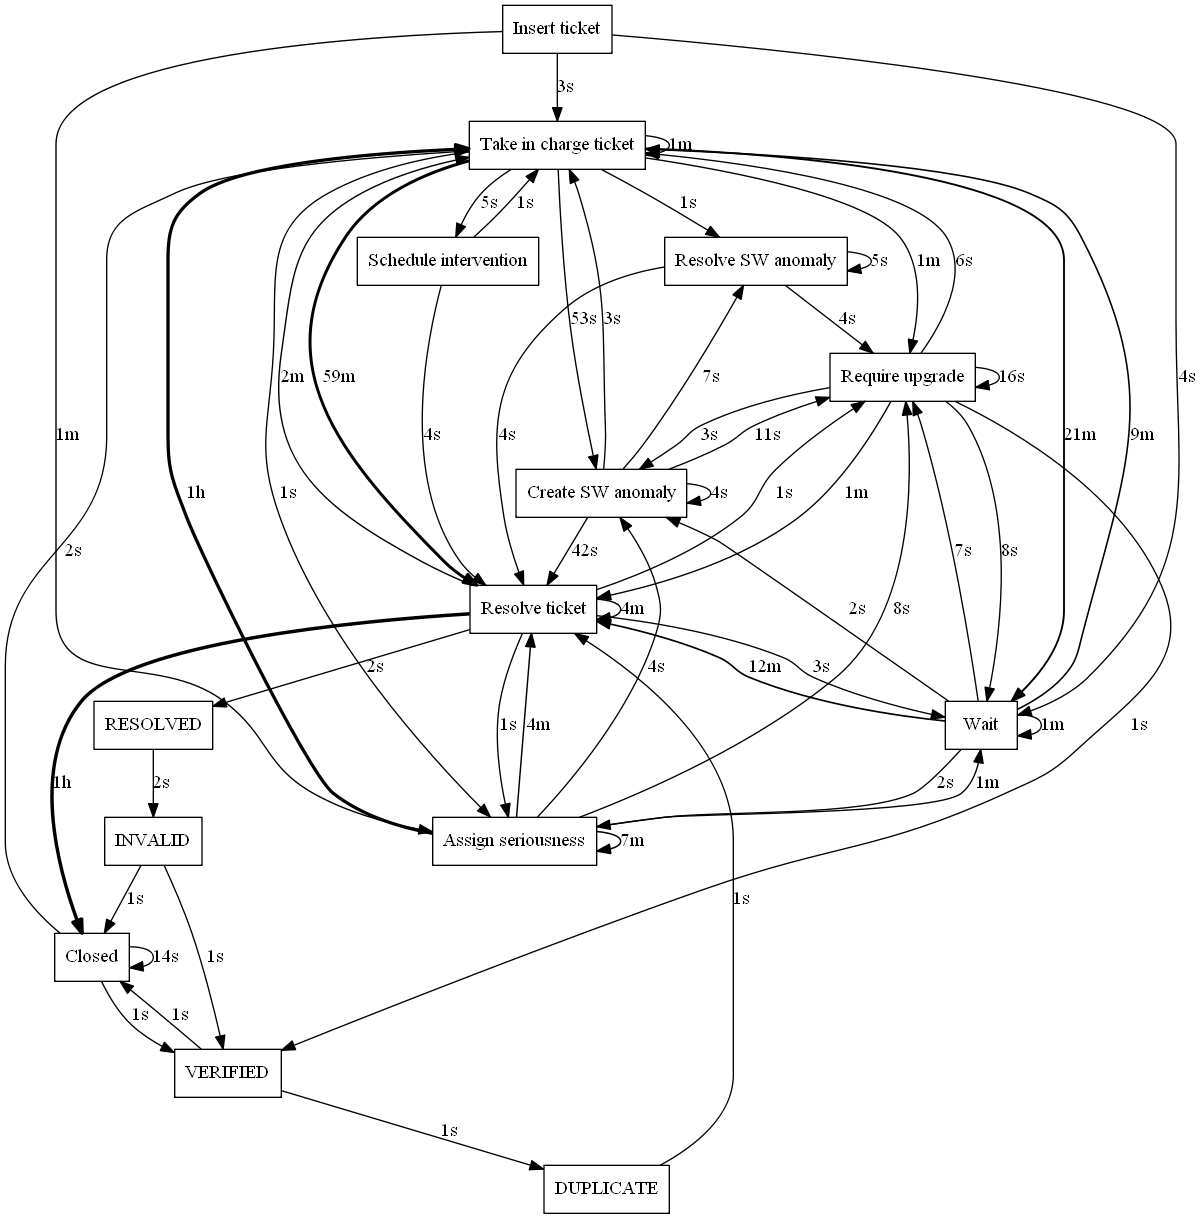

In [188]:
# Your code

# Mining for a directly-follow graph
dfg = dfg_factory.apply(log)

#Model with frequency information
print('Model with frequency information \n')
gviz_dfg = dfg_vis_factory.apply(dfg, log=log, variant='frequency')
dfg_vis_factory.view(gviz_dfg)

#Model with performance information
print('Model with performance information \n')
gviz_dfg = dfg_vis_factory.apply(dfg, log=log, variant='performance')
dfg_vis_factory.view(gviz_dfg)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation: If i was the process owner and had more resources to hire employees then i would assign them to 'Take in charge ticket', 'Resolve ticket', 'Assign seriousness and 'closed' for maximizing the efficiency since from the performance information of the process it can be seen that these events take the most amount of time.


(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:By frequency information self loops can be seen moreover, we can also see the frequency of each individual event which can tell us about the events which are carried out frequently. By Performance information we can see the time taken for each activity this can help in determining where the process is taking more time and can identify the reason for delay. Yes the process has a happy path Take in charge ticket, Resolve ticket, Assign seriousness, closed and it is shown in the enhanced process models. The major bottleneck can be seen in performance informance in which the event transitions from Take in charge to Resolve ticket takes 59m, also the transition from resolve ticket to close takes 1h, moreover; transition from Assign seriousness to Take in charge ticket takes 1h. Yes, there is rework like from frequency information it can be seen that 3563 times there has been a transition from Take in charge ticket to Resolve ticket and there has been 154 transitions from Resolve ticket back to Take in charge ticket.
